In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cpdetect import cpDetector
from mpmath import mpf, gamma, log
import scipy.io as sio
import pandas as pd
from tqdm import *

In [2]:
# Generate random trajectory
sample_1 = np.random.lognormal(0.95, 0.1, size=500)
sample_2 = np.random.lognormal(1.0, 0.1, size=500)
sample_3 = np.random.lognormal(1.20, 0.1, size=500)
sample_4 = np.random.lognormal(1.05, 0.1, size=500)

In [3]:
sampl_1 = np.concatenate((sample_3, sample_1, sample_3, sample_2, sample_4, sample_1, sample_3, sample_2, sample_4))
sampl_2 = np.concatenate((sample_1, sample_2, sample_3))
s = [sampl_1, sampl_2]

In [4]:
detector = cpDetector(s, distribution='log_normal', log_odds_threshold=0)

In [5]:
detector.detect_cp()

11:31:44 INFO cpDetector: =======================================
11:31:44 INFO cpDetector: Running change point detector
11:31:44 INFO cpDetector: =======================================
11:31:44 INFO cpDetector:    input observations: 2 of length [4500, 1500]
11:31:44 INFO cpDetector: Running cp detector on traj 0
11:31:44 INFO cpDetector: ---------------------------------
11:31:44 INFO cpDetector:     Found a new change point at: 500!!
11:31:45 INFO cpDetector:     Found a new change point at: 1000!!
11:31:45 INFO cpDetector:     Found a new change point at: 1502!!
11:31:45 INFO cpDetector:     Found a new change point at: 3000!!
11:31:46 INFO cpDetector:     Found a new change point at: 2511!!
11:31:46 INFO cpDetector:     Found a new change point at: 1970!!
11:31:46 INFO cpDetector:     Found a new change point at: 3502!!
11:31:46 INFO cpDetector:     Found a new change point at: 3970!!
11:31:46 INFO cpDetector: Generating step fucntion
11:31:46 INFO cpDetector: ------------------

100%|██████████| 2/2 [00:00<00:00, 15.69it/s]


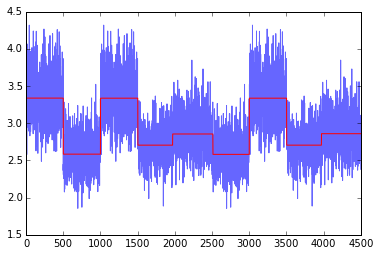

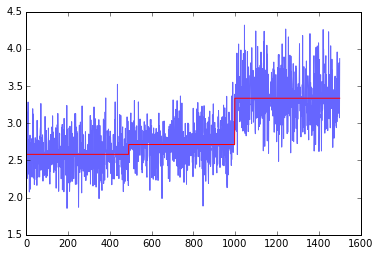

In [6]:
for i in tqdm(range(len(s))):
    plt.figure(i)
    plt.plot(s[i], alpha=0.6)
    plt.plot(detector.step_function['traj_%s' % i], 'r', linewidth=1)

In [7]:
# Save step function to csv (if trajectories are of same length, you don't have to orient by index. It will orient
# by traj)
df = pd.DataFrame.from_dict(detector.step_function, orient='index')
df.to_csv('step_function.csv')

In [8]:
# Save change_point (ts, log_odds associated wit the t, and (start_end) of segment to csv)
detector.to_csv('ts_log_odds.csv')